# Dataset Initialization

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0.5], [2.5]])
Y = np.array([[0.2], [0.9]])

#Initialize weights and bias

In [2]:
np.random.seed(42)
weights = np.random.randn(1, 1)
bias = np.random.randn(1, 1)

# Activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)

# Forward pass
def forward_pass(X, weights, bias):
    return sigmoid(np.dot(X, weights) + bias)

# Loss function (MSE)
def compute_loss(Y_true, Y_pred):
    return np.mean((Y_true - Y_pred) ** 2)

# Backpropagation and weight update
def update_weights(X, Y_true, weights, bias, learning_rate, method="stochastic"):
    m = len(X)
    if method == "stochastic":
        for i in range(m):
            Y_pred = forward_pass(X[i:i+1], weights, bias)
            error = Y_true[i:i+1] - Y_pred
            weights += learning_rate * error * X[i:i+1] * sigmoid_derivative(Y_pred)
            bias += learning_rate * error * sigmoid_derivative(Y_pred)
    elif method == "batch":
        Y_pred = forward_pass(X, weights, bias)
        error = Y_true - Y_pred
        weights += learning_rate * np.dot(X.T, error * sigmoid_derivative(Y_pred)) / m
        bias += learning_rate * np.mean(error * sigmoid_derivative(Y_pred), axis=0)
    return weights, bias

#Training

In [3]:
epochs = 1000
learning_rate = 0.01
losses_stochastic = []
losses_batch = []

for epoch in range(epochs):
    # Stochastic Gradient Descent
    weights_stochastic, bias_stochastic = update_weights(X, Y, weights, bias, learning_rate, method="stochastic")
    Y_pred_stochastic = forward_pass(X, weights_stochastic, bias_stochastic)
    loss_stochastic = compute_loss(Y, Y_pred_stochastic)
    losses_stochastic.append(loss_stochastic)

    # Batch Gradient Descent
    weights_batch, bias_batch = update_weights(X, Y, weights, bias, learning_rate, method="batch")
    Y_pred_batch = forward_pass(X, weights_batch, bias_batch)
    loss_batch = compute_loss(Y, Y_pred_batch)
    losses_batch.append(loss_batch)


#Plotting MSE and Accuracy

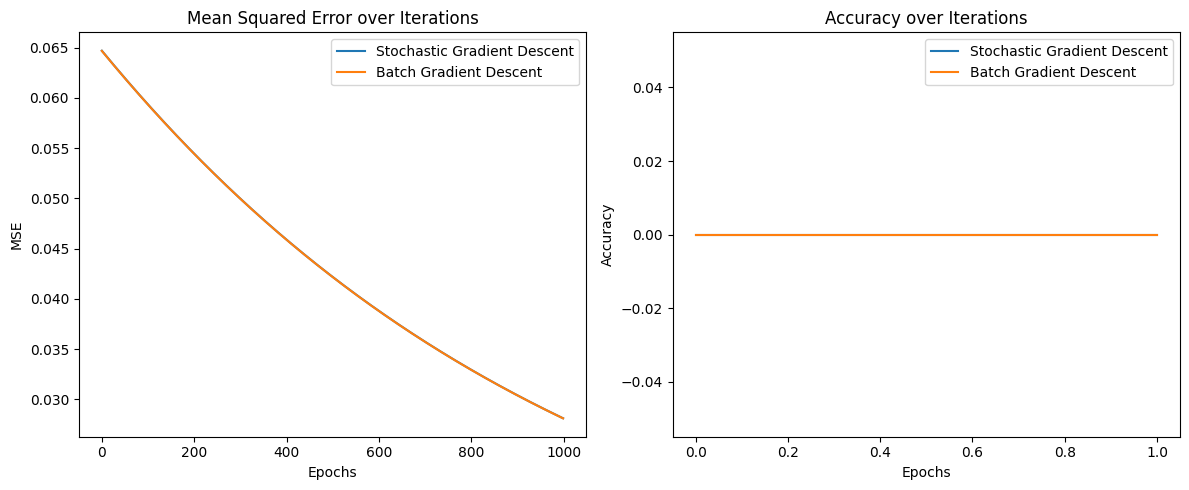

In [4]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses_stochastic, label='Stochastic Gradient Descent')
plt.plot(losses_batch, label='Batch Gradient Descent')
plt.title('Mean Squared Error over Iterations')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

accuracy_stochastic = [(1 if y_pred >= 0.5 else 0) == y_true for y_pred, y_true in zip(Y_pred_stochastic, Y)]
accuracy_batch = [(1 if y_pred >= 0.5 else 0) == y_true for y_pred, y_true in zip(Y_pred_batch, Y)]

plt.subplot(1, 2, 2)
plt.plot(np.cumsum(accuracy_stochastic) / (np.arange(len(accuracy_stochastic)) + 1), label='Stochastic Gradient Descent')
plt.plot(np.cumsum(accuracy_batch) / (np.arange(len(accuracy_batch)) + 1), label='Batch Gradient Descent')
plt.title('Accuracy over Iterations')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#Interpretation

In [5]:
print("Final weights using stochastic gradient descent:", weights_stochastic)
print("Final bias using stochastic gradient descent:", bias_stochastic)
print("Final weights using batch gradient descent:", weights_batch)
print("Final bias using batch gradient descent:", bias_batch)


Final weights using stochastic gradient descent: [[0.84823861]]
Final bias using stochastic gradient descent: [[-0.78330022]]
Final weights using batch gradient descent: [[0.84823861]]
Final bias using batch gradient descent: [[-0.78330022]]


#**Gradient Descent:**
 Stochastic gradient descent updates weights more frequently, which can lead to faster convergence but more noise. Batch gradient descent smooths out updates by considering all training samples.

 Stochastic Gradient Descent (SGD) updates the model's parameters after processing each individual training example, leading to quicker, noisier updates that can help escape local minima and speed up convergence.

  Batch Gradient Descent, on the other hand, updates the parameters after processing the entire dataset in one go, resulting in more stable but slower updates, which can be computationally expensive for large datasets.

#**Results:**
**The MSE and accuracy plots indicate how well the model is learning. Ideally, you should see a decreasing trend in MSE and an increasing trend in accuracy over iterations.**